In [24]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters
from keras.utils import to_categorical

import matplotlib.pyplot as plt 

#### Descarguemos datos

In [2]:
(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [ ]:
# Diccionario de palabras
word_index = reuters.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])

for _ in train_data[0]:
    print(word_index.get(_ - 3))

In [17]:
# Función de vectorizar
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        results[i,sequences]=1
    return results

In [18]:
# Transformando los datos
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [19]:
# Data de validación
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train =  y_train[1000:]

In [20]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Creando la red neuronal

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### Compilando la red

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

#### Entrenando el modelo

In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=30,
                   batch_size=512,
                   validation_data=(x_val,y_val))

#### Validamos resultados

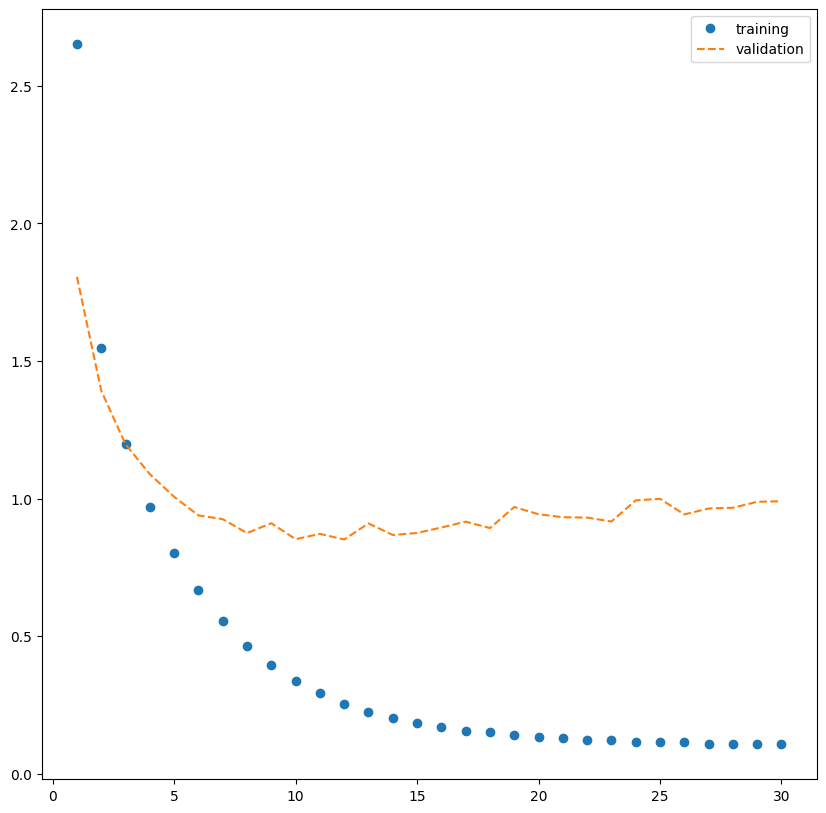

In [28]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='validation')
plt.legend()
plt.show()

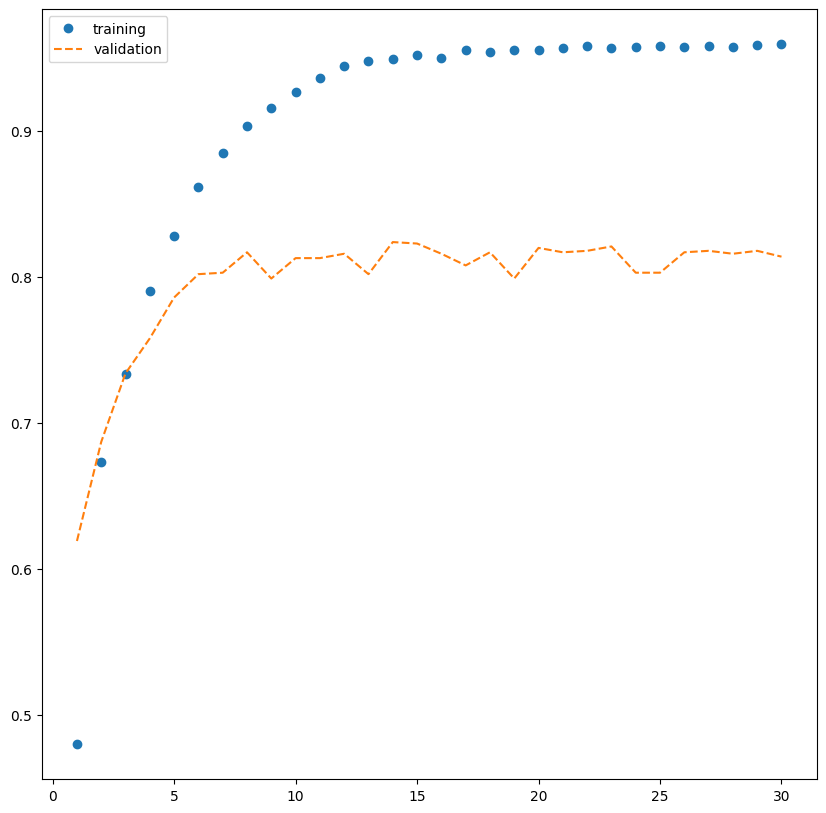

In [27]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(acc_values)+1)
plt.plot(epoch,acc_values, 'o',label='training')
plt.plot(epoch,val_acc_values, '--',label='validation')
plt.legend()
plt.show()

In [29]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 6ms/step - loss: 1.1323 - accuracy: 0.7867


[1.132258415222168, 0.7867319583892822]

#### Haciendo predicciones

In [30]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [31]:
predictions[0]

array([2.1285716e-06, 3.4988076e-08, 2.2857800e-09, 9.9657285e-01,
       2.5583343e-03, 6.8885814e-11, 2.0502069e-09, 3.0081995e-07,
       6.5355370e-04, 1.2408634e-07, 6.1000442e-08, 2.7565384e-05,
       4.7089152e-06, 3.2793446e-07, 1.1865744e-07, 3.6790347e-08,
       1.1982692e-05, 4.8712917e-07, 1.0672272e-07, 6.1372302e-05,
       8.9471687e-05, 1.1818250e-06, 5.2067066e-09, 1.6896443e-06,
       1.7552722e-08, 7.5374686e-07, 1.2462012e-07, 8.1965430e-07,
       6.3366095e-08, 5.9475110e-07, 5.2798566e-07, 1.7963179e-08,
       1.3977458e-06, 3.5106481e-07, 8.7438963e-08, 1.0441925e-07,
       1.9203085e-06, 5.3446367e-09, 4.7033499e-08, 6.6282905e-06,
       2.0119639e-09, 9.2147863e-09, 6.5010948e-09, 2.4427094e-09,
       5.8130090e-10, 3.9977746e-09], dtype=float32)

In [32]:
np.sum(predictions[0])

0.99999994

In [33]:
np.argmax(predictions[0])

3